## ----------------------- Satisfication Index of Employee for Work Evaluation -----------------------

# Definition, Problems, Goals, Limitasi Model

------------------------------------------------------------------------------------------------------------------------------------------------------

### Definition

This Machine Learning is a model for determining the employee satisfaction index at work that can be used by companies to evaluate employee performance. So, it can be used further as a tool to select employees for promotion or attrition.

### Problems & Goals

2.1 Problems
- August 2020, Covid cases in Indonesia are still increasing (national.kompas.com). One of the effects of this covid is the reduction in the number of employees working in a company. Lots of companies lay off employees to stabilize their finances. However, when carrying out layoffs, it will be very disadvantage to the company if they fire quality employees. Therefore, this machine model will be very helpful to be used as an employee evaluation while working in a company

- According to Maier (2000: 116), the factors that affect termination of employment are:
  1. Age
  2. Length of Work
  3. Satisfaction
  4. Company Culture
  Based on the factors mentioned above, it is very important to know the Employee Job Satisfaction Index

2.2 Goals
- Knowing what variables can affect the employee job satisfaction index.
- Creating a model that can determine the employee job satisfaction index at work that can be used as a job evaluation material.

2.3 Limitation
- This model is only a tool to determine the employee satisfaction index in percentage levels, but it can be developed further to detect employee churn / no churn.
- This model can be used for various companies as a consideration in terminating or promoting employee positions.

# Import Package

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

%matplotlib inline

from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, power_transform, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


# Import Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
df = pd.read_csv('satisfaction.csv', index_col=0)
df1 = df.copy()

In [4]:
df1.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


------------------------------------------------------------------------------------------------------------------------------------------------------

# Missing Value

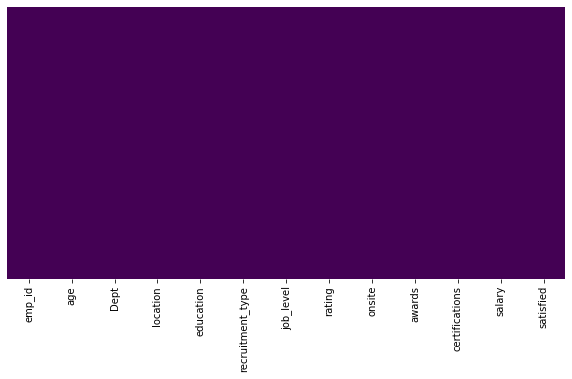

In [5]:
plt.figure(figsize=(10, 5))

sns.heatmap(df1.isna(), yticklabels=False, cmap='viridis', cbar=False)
plt.show()

- It can be seen in this dataset that there are no nan values, so the dataset can be used immediately without the need for handling missing values

------------------------------------------------------------------------------------------------------------------------------------------------------

# Describe Data

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   emp_id            500 non-null    object
 1   age               500 non-null    int64 
 2   Dept              500 non-null    object
 3   location          500 non-null    object
 4   education         500 non-null    object
 5   recruitment_type  500 non-null    object
 6   job_level         500 non-null    int64 
 7   rating            500 non-null    int64 
 8   onsite            500 non-null    int64 
 9   awards            500 non-null    int64 
 10  certifications    500 non-null    int64 
 11  salary            500 non-null    int64 
 12  satisfied         500 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 54.7+ KB


In [7]:
df1.columns

Index(['emp_id', 'age', 'Dept', 'location', 'education', 'recruitment_type',
       'job_level', 'rating', 'onsite', 'awards', 'certifications', 'salary',
       'satisfied'],
      dtype='object')

##### Variabel

- emp_id - Unique ID
- age - Age
- Dept - Department
- location - Employee location
- education - Employee's education status
- recruitment_type - Mode of recruitment
- job_level - 1 to 5. The job level of the employee. 1 being the least and 5 being the highest position
- rating - 1 to 5. The previous year rating of the employee. 1 being the least and 5 being the highest position
- onsite - Has the employee ever went to an onsite location? 0 and 1
- awards - No. of awards
- certifications - Is the employee certified?
- salary - Net Salary
- satisfied - Is the employee satisfied with his job?

In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,500.0,38.610,9.438648,23.0,30.0,39.0,47.0,54.0
job_level,500.0,3.032,1.423738,1.0,2.0,3.0,4.0,5.0
rating,500.0,3.072,1.425089,1.0,2.0,3.0,4.0,5.0
onsite,500.0,0.466,0.499342,0.0,0.0,0.0,1.0,1.0
awards,500.0,4.538,2.853215,0.0,2.0,5.0,7.0,9.0
certifications,500.0,0.496,0.500485,0.0,0.0,0.0,1.0,1.0
salary,500.0,50416.056,23671.392661,24076.0,29805.0,42419.0,65715.0,86750.0
satisfied,500.0,0.526,0.499824,0.0,0.0,1.0,1.0,1.0


In [9]:
df1.describe(include='O').T

,count,unique,top,freq
emp_id,500,499,MKT7287,2
Dept,500,5,Purchasing,109
location,500,2,City,259
education,500,2,PG,254
recruitment_type,500,4,On-Campus,133


- There is a duplicates emp_id

In [10]:
df1[df1.emp_id=='MKT7287']

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
188,MKT7287,41,Marketing,City,UG,Referral,2,5,0,0,1,29805,1
215,MKT7287,50,Marketing,City,PG,Referral,2,2,0,1,0,29805,0


- The duplicates emp_id is weird, because emp_id should a unique number, so the employee must have different emp_id. Maybe I will drop this duplicates data when do cleaning

In [11]:
bsDESC =[]

for i in df1.columns:
    bsDESC.append([
        i,
        df1[i].dtypes,
        df1[i].isnull().sum(),
        round((((df1[i].isnull().sum()) / (len(df1))) * 100),2), 
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

In [12]:
dfDesc = pd.DataFrame(bsDESC, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'])

In [13]:
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,emp_id,object,0,0.0,499,"[SAL7806, MKT7801]"
1,age,int64,0,0.0,32,"[31, 41]"
2,Dept,object,0,0.0,5,"[Purchasing, Marketing]"
3,location,object,0,0.0,2,"[City, Suburb]"
4,education,object,0,0.0,2,"[UG, PG]"
5,recruitment_type,object,0,0.0,4,"[On-Campus, Walk-in]"
6,job_level,int64,0,0.0,5,"[5, 3]"
7,rating,int64,0,0.0,5,"[5, 2]"
8,onsite,int64,0,0.0,2,"[0, 1]"
9,awards,int64,0,0.0,10,"[1, 8]"


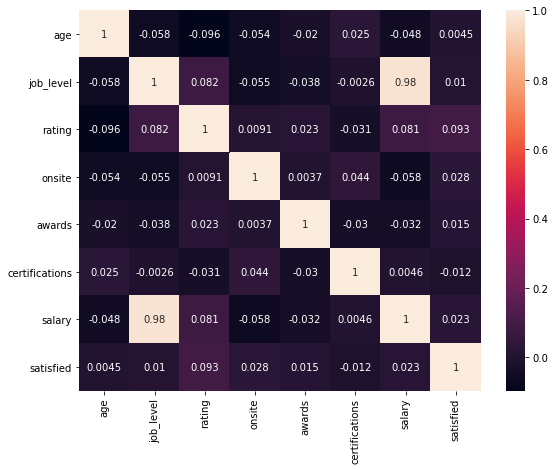

In [14]:
plt.figure(figsize=(9,7))
sns.heatmap(df1.corr(), annot=True, cbar='virids')
plt.show()

#### Hypothesis

Actually, there is no strong correlation between satisfied and other variable. But, based on logic The variable that has strong correlation with satisfied is:
1. Salary
2. Job_level
3. Rating
4. Education
5. Certifications

### Imbalance Data Check

In [18]:
df1.satisfied.value_counts()

1    263
0    237
Name: satisfied, dtype: int64

In [19]:
df1.satisfied.value_counts(normalize=True)*100

1    52.6
0    47.4
Name: satisfied, dtype: float64

- Target (satisfaction index) __Balance__